In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import math

c1 = np.array([3.646E5, 3.15E6, 1.775E6, 1.028E7, 4.975E6]) #mod
c1n = c1/3.646E5
c2 = np.array([3.646E5, 3.375E6, 5.275E6, np.nan, 4.175E8]) #np.nan --> overgrown #mod
c2n = c2/3.646E5
#print((np.log10(c2[2])+np.log10(c2[4])))
#c2_interpolatedish = np.array([3.646E5, 3.375E6, 5.275E6, 15.342878943789351E6, 4.175E8])
c3 = np.array([3.646E5, 1.875E6, 2.225E6, 2.25E6, 1.15E6]) #mod
c3n = c3/3.646E5

g4 = np.array([3.646E5, 8.0E8, 1.975E9, 1.775E10, 1.8E9]) #mod
g4n = g4/3.646E5
g5 = np.array([3.646E5, 8.75E8, 2.233E9, 1.125E10, 3.875E10]) #mod
g5n = g5/3.646E5
g6 = np.array([3.646E5, 1.325E9, 3.25E9, 4.45E10, 2.65E9]) #mod
g6n = g6/3.646E5

t7 = np.array([3.646E5, 9.25E5, 1.4E6, 2.55E6, 9.5E6]) #mod
t7n = t7/3.646E5
t8 = np.array([3.646E5, 1.275E6, 3.05E6, 5.75E7, 2.3E9]) #mod
t8n = t8/3.646E5
t9 = np.array([3.646E5, 7.75E5, 2.225E6, 1.55E7, 2.15E10]) #mod
t9n = t9/3.646E5

b10 = np.array([6.0E5, np.nan]) #np.nan --> No cells present #mod
b10n = b10/6.0E5
b11 = np.array([6.0E5, 1.35E3]) #mod
b11n = b11/6.0E5
b12 = np.array([6.0E5, 2.45E7]) #mod
b12n = b12/6.0E5


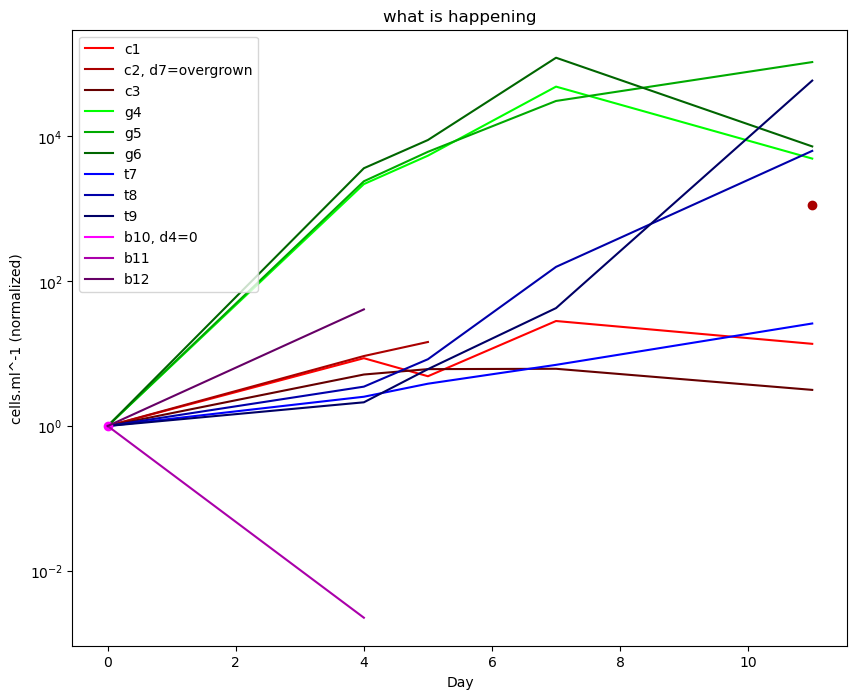

In [2]:
day = np.array([0, 4, 5, 7, 11]) #mod
day_b = np.array([0, 4]) #mod

plt.figure(figsize=(10, 8))
plt.semilogy(day, c1n, label="c1", color="#FF0000")
plt.semilogy(day, c2n, label="c2, d7=overgrown", color="#AA0000")
plt.semilogy(11, c2n[4], 'o', color="#AA0000")
plt.semilogy(day, c3n, label="c3", color="#660000")
plt.semilogy(day, g4n, label="g4", color="#00FF00")
plt.semilogy(day, g5n, label="g5", color="#00AA00")
plt.semilogy(day, g6n, label="g6", color="#006600")
plt.semilogy(day, t7n, label="t7", color="#0000FF")
plt.semilogy(day, t8n, label="t8", color="#0000AA")
plt.semilogy(day, t9n, label="t9", color="#000066")
plt.semilogy(day_b, b10n, label="b10, d4=0", color="#FF00FF")
plt.semilogy(0, b10n[0], 'o', color="#FF00FF")
plt.semilogy(day_b, b11n, label="b11", color="#AA00AA")
plt.semilogy(day_b, b12n, label="b12", color="#660066")

plt.xlabel("Day")
plt.ylabel("cells.ml^-1 (normalized)")
plt.title("what is happening")
plt.legend(loc='upper left')
plt.show()

In [3]:
def mean_of_arrays (a,b,c):
    mean_arr = np.array([(a[i]+b[i]+c[i])/3 for i in range (len(a))])
    return mean_arr

c_mean = mean_of_arrays(c1,c2,c3)
c_mean[3] = (c1[3]+c3[3])/2 #mod
c_mean_n = c_mean/3.646E5

g_mean = mean_of_arrays(g4,g5,g6)
g_mean_n = g_mean/3.646E5

t_mean = mean_of_arrays(t7,t8,t9)
t_mean_n = t_mean/3.646E5

b_mean = mean_of_arrays(b10,b11,b12)
b_mean[1] = (0+b11[1]+b12[1])/3 #mod
b_mean_n = b_mean/6.0E5

print(c_mean, g_mean, t_mean, b_mean)
        

[3.64600000e+05 2.80000000e+06 3.09166667e+06 6.26500000e+06
 1.41208333e+08] [3.646e+05 1.000e+09 2.486e+09 2.450e+10 1.440e+10] [3.64600000e+05 9.91666667e+05 2.22500000e+06 2.51833333e+07
 7.93650000e+09] [ 600000.         8167116.66666667]


In [4]:
import statistics

c_matrix = np.column_stack((c1,c2,c3))
c_matrix[3][1] = np.nan
g_matrix = np.column_stack((g4,g5,g6))
t_matrix = np.column_stack((t7,t8,t9))
b_matrix = np.column_stack((b10,b11,b12))
b_matrix[1][0] = 0
print(c_matrix)
#print(c_matrix[0])

#print(b_matrix)

day0_stdev = np.std([4.12E5, 3.167E5])
day0_b_stdev = np.std([6.0E5])

day_0_sem = day0_stdev/(2**0.5)
day_0_b_sem = day0_b_stdev/(1**0.5)
print(day0_stdev)
print(day0_b_stdev)

#for i in len(c1):
stdev_c = np.column_stack((np.std(c_matrix[0]), np.std(c_matrix[1]), np.std(c_matrix[2]), np.std(c_matrix[3]), np.std(c_matrix[4]))) #mod
stdev_c[0][0] = day0_stdev
stdev_c[0][3] = np.std([c_matrix[3][0], c_matrix[3][2]])
stdev_c_n = stdev_c/3.646E5
sem_c = stdev_c/(3**0.5)
sem_c[0][0] = day_0_sem
sem_c[0][3] = (sem_c[0][3]*(3**0.5))/(2**0.5)
sem_c_n = sem_c/3.646E5
print("stdev_c_n", stdev_c_n)
print("stdev_c_n/(3**0.5)", stdev_c_n/(3**0.5))
print("sem_c_n", sem_c_n)

stdev_g = np.column_stack((np.std(g_matrix[0]), np.std(g_matrix[1]), np.std(g_matrix[2]), np.std(g_matrix[3]), np.std(g_matrix[4]))) #mod
stdev_g[0][0] = day0_stdev
stdev_g_n = stdev_g/3.646E5
sem_g = stdev_g/(3**0.5)
sem_g[0][0] = day_0_sem
sem_g_n = sem_g/3.646E5
print("stdev_g",stdev_g)

stdev_t = np.column_stack((np.std(t_matrix[0]), np.std(t_matrix[1]), np.std(t_matrix[2]), np.std(t_matrix[3]), np.std(t_matrix[4]))) #mod
stdev_t[0][0] = day0_stdev
stdev_t_n = stdev_t/3.646E5
sem_t = stdev_t/(3**0.5)
sem_t[0][0] = day_0_sem
sem_t_n = sem_t/3.646E5
print("stdev_t",stdev_t)

stdev_b = np.column_stack((np.std(b_matrix[0]), np.std(b_matrix[1]))) #mod
stdev_b[0][0] = day0_b_stdev
stdev_b_n = stdev_b/6.0E5
sem_b = stdev_b/(3**0.5)
sem_b[0][0] = day_0_b_sem
sem_b_n = sem_b/6.0E5
print("stdev_b",stdev_b)

print("stdev_c_n", stdev_c_n)
print("stdev_g_n", stdev_g_n)
print("stdev_t_n", stdev_t_n)
print("stdev_b_n", stdev_b_n)



[[3.646e+05 3.646e+05 3.646e+05]
 [3.150e+06 3.375e+06 1.875e+06]
 [1.775e+06 5.275e+06 2.225e+06]
 [1.028e+07       nan 2.250e+06]
 [4.975e+06 4.175e+08 1.150e+06]]
47650.0
0.0
stdev_c_n [[1.30691168e-01 1.81155305e+00 4.26423985e+00 1.10120680e+01
  5.35858342e+02]]
stdev_c_n/(3**0.5) [[7.54545813e-02 1.04590064e+00 2.46196003e+00 6.35782044e+00
  3.09377958e+02]]
sem_c_n [[9.24126114e-02 1.04590064e+00 2.46196003e+00 7.78670797e+00
  3.09377958e+02]]
stdev_g [[4.76500000e+04 2.31840462e+08 5.50401672e+08 1.43889425e+10
  1.72215466e+10]]
stdev_t [[4.76500000e+04 2.09496751e+05 6.73609679e+05 2.34549331e+07
  9.63632007e+09]]
stdev_b [[       0.         11549092.57447913]]
stdev_c_n [[1.30691168e-01 1.81155305e+00 4.26423985e+00 1.10120680e+01
  5.35858342e+02]]
stdev_g_n [[1.30691168e-01 6.35876200e+02 1.50960415e+03 3.94650096e+04
  4.72340828e+04]]
stdev_t_n [[1.30691168e-01 5.74593394e-01 1.84753066e+00 6.43305901e+01
  2.64298411e+04]]
stdev_b_n [[ 0.         19.24848762]]


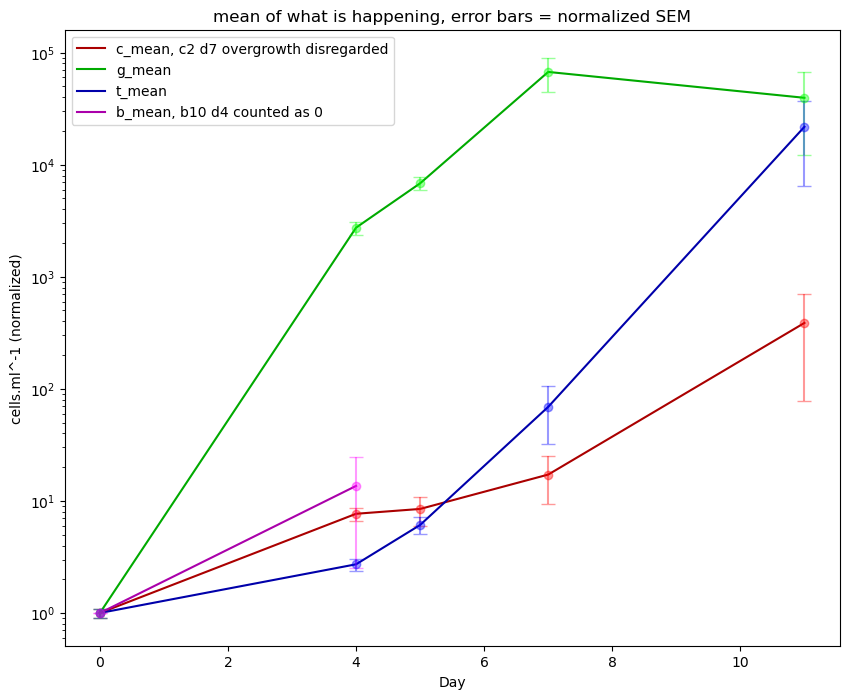

In [5]:

plt.figure(figsize=(10, 8))

plt.semilogy(day, c_mean_n, label="c_mean, c2 d7 overgrowth disregarded", color="#AA0000")
plt.errorbar(day, c_mean_n, yerr=sem_c_n, fmt='o', capsize=5, color="#FF0000", alpha=0.4)

plt.semilogy(day, g_mean_n, label="g_mean", color="#00AA00")
plt.errorbar(day, g_mean_n, yerr=sem_g_n, fmt='o', capsize=5, color="#00FF00", alpha=0.4)

plt.semilogy(day, t_mean_n, label="t_mean", color="#0000AA")
plt.errorbar(day, t_mean_n, yerr=sem_t_n, fmt='o', capsize=5, color="#0000FF", alpha=0.4)

plt.semilogy(day_b, b_mean_n, label="b_mean, b10 d4 counted as 0", color="#AA00AA")
plt.errorbar(day_b, b_mean_n, yerr=sem_b_n, fmt='o', capsize=5, color="#FF00FF", alpha=0.4)


plt.xlabel("Day")
plt.ylabel("cells.ml^-1 (normalized)")
plt.title("mean of what is happening, error bars = normalized SEM")
plt.legend(loc='upper left')
plt.show()


In [2]:
"""
plt.figure(figsize=(10, 8))

plt.semilogy(day, c_mean_n, label="c_mean, c2 d7 overgrowth disregarded", color="#AA0000")
plt.errorbar(day, c_mean_n, yerr=stdev_c_n, fmt='o', capsize=5, color="#FF0000", alpha=0.4)

plt.semilogy(day, g_mean_n, label="g_mean", color="#00AA00")
plt.errorbar(day, g_mean_n, yerr=stdev_g_n, fmt='o', capsize=5, color="#00FF00", alpha=0.4)

plt.semilogy(day, t_mean_n, label="t_mean", color="#0000AA")
plt.errorbar(day, t_mean_n, yerr=stdev_t_n, fmt='o', capsize=5, color="#0000FF", alpha=0.4)

plt.semilogy(day_b, b_mean_n, label="b_mean, b10 d4 counted as 0", color="#AA00AA")
plt.errorbar(day_b, b_mean_n, yerr=stdev_b_n, fmt='o', capsize=5, color="#FF00FF", alpha=0.4)


plt.xlabel("Day")
plt.ylabel("cells.ml^-1 (normalized)")
plt.title("what is happening, stdev_x_n")
plt.legend(loc='upper left')
plt.show()
"""

"""
plt.figure(figsize=(10, 8))

plt.semilogy(day, c_mean, label="c_mean, c2 d7 overgrowth disregarded", color="#AA0000")
plt.errorbar(day, c_mean, yerr=sem_c, fmt='o', capsize=5, color="#FF0000", alpha=0.4)

plt.semilogy(day, g_mean, label="g_mean", color="#00AA00")
plt.errorbar(day, g_mean, yerr=sem_g, fmt='o', capsize=5, color="#00FF00", alpha=0.4)

plt.semilogy(day, t_mean, label="t_mean", color="#0000AA")
plt.errorbar(day, t_mean, yerr=sem_t, fmt='o', capsize=5, color="#0000FF", alpha=0.4)

plt.semilogy(day_b, b_mean, label="b_mean, b10 d4 counted as 0", color="#AA00AA")
plt.errorbar(day_b, b_mean, yerr=sem_b, fmt='o', capsize=5, color="#FF00FF", alpha=0.4)


plt.xlabel("Day")
plt.ylabel("cells.ml^-1 (normalized)")
plt.title("what is happening, sem_x")
plt.legend(loc='upper left')
plt.show()
"""

"""
plt.figure(figsize=(10, 8))

plt.semilogy(day, c_mean, label="c_mean, c2 d7 overgrowth disregarded", color="#AA0000")
plt.errorbar(day, c_mean, yerr=stdev_c, fmt='o', capsize=5, color="#FF0000", alpha=0.4)

plt.semilogy(day, g_mean, label="g_mean", color="#00AA00")
plt.errorbar(day, g_mean, yerr=stdev_g, fmt='o', capsize=5, color="#00FF00", alpha=0.4)

plt.semilogy(day, t_mean, label="t_mean", color="#0000AA")
plt.errorbar(day, t_mean, yerr=stdev_t, fmt='o', capsize=5, color="#0000FF", alpha=0.4)

plt.semilogy(day_b, b_mean, label="b_mean, b10 d4 counted as 0", color="#AA00AA")
plt.errorbar(day_b, b_mean, yerr=stdev_b, fmt='o', capsize=5, color="#FF00FF", alpha=0.4)


plt.xlabel("Day")
plt.ylabel("cells.ml^-1 (normalized)")
plt.title("what is happening, stdev_x")
plt.legend(loc='upper left')
plt.show()
"""

'\nplt.figure(figsize=(10, 8))\n\nplt.semilogy(day, c_mean, label="c_mean, c2 d7 overgrowth disregarded", color="#AA0000")\nplt.errorbar(day, c_mean, yerr=stdev_c, fmt=\'o\', capsize=5, color="#FF0000", alpha=0.4)\n\nplt.semilogy(day, g_mean, label="g_mean", color="#00AA00")\nplt.errorbar(day, g_mean, yerr=stdev_g, fmt=\'o\', capsize=5, color="#00FF00", alpha=0.4)\n\nplt.semilogy(day, t_mean, label="t_mean", color="#0000AA")\nplt.errorbar(day, t_mean, yerr=stdev_t, fmt=\'o\', capsize=5, color="#0000FF", alpha=0.4)\n\nplt.semilogy(day_b, b_mean, label="b_mean, b10 d4 counted as 0", color="#AA00AA")\nplt.errorbar(day_b, b_mean, yerr=stdev_b, fmt=\'o\', capsize=5, color="#FF00FF", alpha=0.4)\n\n\nplt.xlabel("Day")\nplt.ylabel("cells.ml^-1 (normalized)")\nplt.title("what is happening, stdev_x")\nplt.legend(loc=\'upper left\')\nplt.show()\n'